### Data Augmentation, 데이터 증강
- 이미지의 종류와 개수가 적으면, CNN 모델의 성능이 떨어질 수 밖에 없다. 또한 몇 안되는 이미지로 훈련시키면 과적합이 발생한다.
- CNN 모델의 성능을 높이고 과적합을 개선하기 위해서는 이미지의 종류와 개수가 많아야 한다. 즉, 데이터의 양을 늘려야 한다.
- 이미지 데이터는 학습 데이터를 수집하여 양을 늘리기 쉽지 않기 때문에, 원본 이미지를 변형 시켜서 양을 늘릴 수 있다.
- Data Augmentation을 통해 원본 이미지에 다양한 변형을 주어서 학습 이미지 데이터를 늘리는 것과 유사한 효과를 볼 수 있다.
- 원본 학습 이미지의 개수를 늘리는 것이 아닌 매 학습 마다 개별 원본 이미지를 변형해서 학습을 수행한다.

<img src="./images/data_augmentation.png" width="400" style="margin-left:

#### 공간 레벨 변형
- 좌우 또는 상하 반전, 특정 영역만큼 확대, 축소, 회전 등으로 변형시킨다.

<img src="./images/spatial.png" width="400" style="margin-left: 30px">

#### 픽셀 레벨 변형
- 밝기 명암, 채도, 색상을 변형시킨다.

<img src="./images/pixel.png" width="400" style="margin-left: 30px"> 30px">

In [11]:
with open('./datasets/animals/translate.py') as f:
    content = f.readline()
    contents1 = eval(content[content.index('{'):content.index('}') + 1])
    contents2 = {v : k for k, v in contents1.items()}

print(contents1, contents2, sep='\n')

{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'dog': 'cane', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'spider': 'ragno', 'squirrel': 'scoiattolo'}
{'dog': 'cane', 'horse': 'cavallo', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'sheep': 'pecora', 'squirrel': 'scoiattolo', 'cane': 'dog', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'ragno': 'spider', 'scoiattolo': 'squirrel'}


In [12]:
from glob import glob
import os

root = './datasets/animals/original/'

directories = glob(os.path.join(root, '*'))

for directory in directories:
    try:
        os.rename(directory, os.path.join(root, contents1[directory[directory.rindex('\\') + 1:]]))
    except KeyError as e:
        os.rename(directory, os.path.join(root, contents2[directory[directory.rindex('\\') + 1:]]))

In [13]:
root = './datasets/animals/original/'

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [14]:
root = './datasets/animals/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root, target_size=(250, 250), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 26179 images belonging to 10 classes.
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 2.2 MB/s eta 0:00:18
   ---------------------------------------- 0.1/38.6 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.2/38.6 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.3/38.6 MB 1.4 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.6 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.4/38.6 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.5/38.6 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.5/38.6 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.6/38.6 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.6/38.6 MB 1.4 MB/s eta 0:00:29
    -

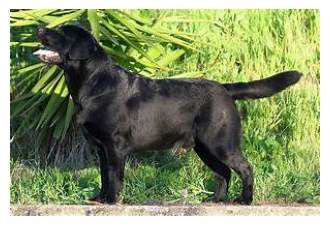

In [17]:
import cv2
import matplotlib.pyplot as plt


image = cv2.cvtColor(cv2.imread(generator.filepaths[3000]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(4,4))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

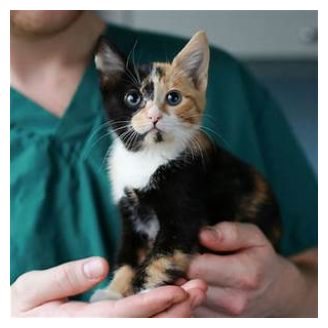

In [38]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Horizontal Filp: 좌우반전 적용
# 적용하더라도 반드시 변환되지 않는다. 특정 확률로 랜덤하게 적용하기 때문이다.
idg = ImageDataGenerator(horizontal_flip=True)

# ImageDataGenerator는 배치 사이즈를 포함한 4차원으로 연산되기 때문에
# 기존 image를 한 차원 증가시켜준다.
image_batch = np.expand_dims(image, axis=0)

# 4차원 이미지(배치 사이즈 포함)를 fit에 전달한다.
idg.fit(image_batch)

# fit한 뒤 flow에 다시 넣어준다.
data_generator = idg.flow(image_batch)

# 적용된 이미지를 next로 가져온다.
aug_image_batch = next(data_generator)

# 이미지를 시각화하기 위해서 한 차원 감소시킨 3차원으로 변경해준다.
aug_image = np.squeeze(aug_image_batch)

# 실수에서 정수로 변경 후 출력해준다.
show_image(aug_image.astype('int'))

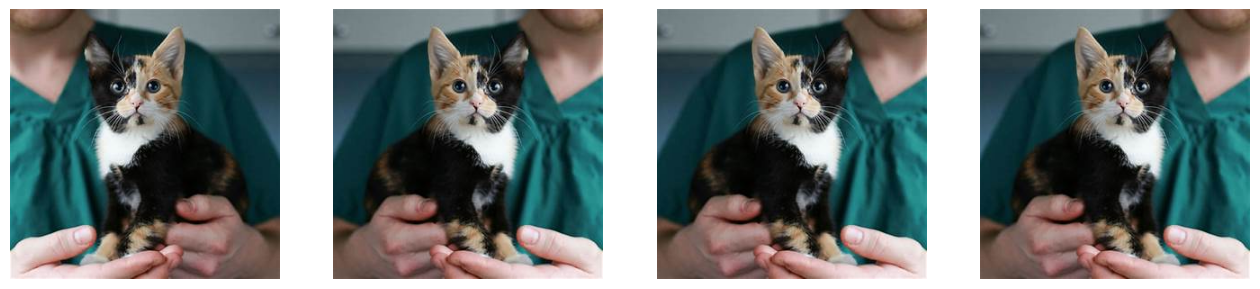

In [40]:
N_IMAGES = 4
fig, axs = plt.subplots(1, N_IMAGES, figsize=(16, 8))

for i in range(N_IMAGES):
    aug_image_batch = next(data_generator)
    aug_image = np.squeeze(aug_image_batch)
    aug_image = aug_image.astype('int')
    axs[i].imshow(aug_image)
    axs[i].axis('off')

In [54]:
def show_aug_image_batch(image, idg, n_image=4, to_int=True):
    image_batch = np.expand_dims(image, axis=0)
    idg.fit(image_batch)
    data_generator = idg.flow(image_batch)

    fig, axs = plt.subplots(1, n_image, figsize=(n_image * 5,8))

    for i in range(n_image):
        aug_image_batch = next(data_generator)
        aug_image = np.squeeze(aug_image_batch)
        if to_int:
            aug_image = aug_image.astype('int')
            
        axs[i].imshow(aug_image)
        axs[i].axis('off')

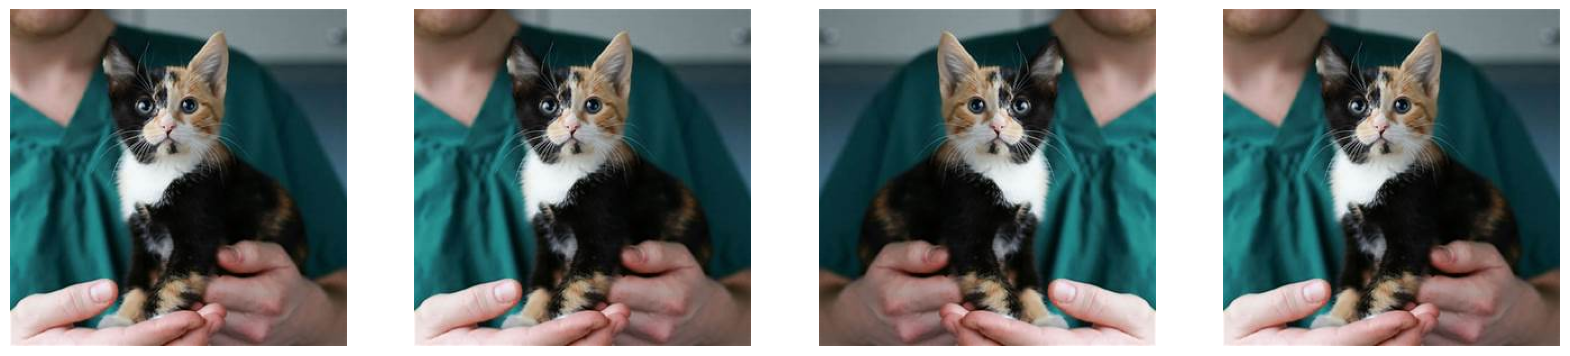

In [57]:
idg = ImageDataGenerator(horizontal_flip=True)

show_aug_image_batch(image, idg)

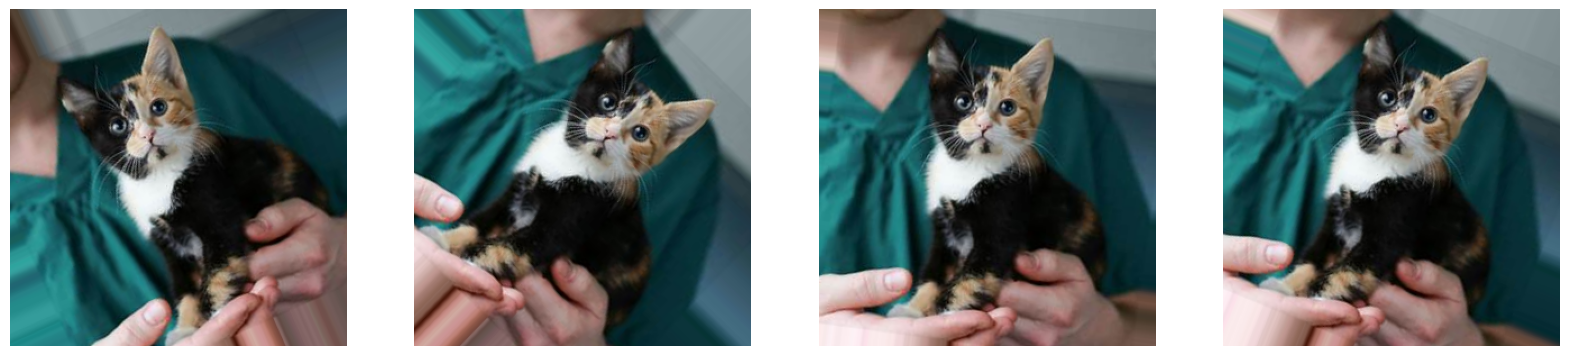

In [58]:
idg = ImageDataGenerator(rotation_range=45)

show_aug_image_batch(image, idg)

In [69]:
idg = ImageDataGenerator(whidt_shift_range=0.4)


show_aug_image_batch(image, idg)

TypeError: ImageDataGenerator.__init__() got an unexpected keyword argument 'whidt_shift_range'

In [ ]:
idg = ImageDataGenerator(whidt)


show_aug_image_batch(image, idg)

In [ ]:
# 빈 공간을 가장 가까운 곳의 픽셀값으로 채움
idg = ImageDataGenerator()
# 빈 공간을 해당 영역 근처 공간으로 채움
idg = ImageDataGenerator()
# 빈 공간을 잘려나간 이미지로 채움
idg = ImageDataGenerator()
# 특정 공간을 잘려나간 이미지로 채움
idg = ImageDataGenerator()
# 특정 픽셀값으로 채움
idg = ImageDataGenerator()

In [ ]:
# Zoom in 확대
idg = ImageDataGenerator(zoom_range=[0.5,0.9])
# Zoom out 축소
idg = ImageDataGenerator(zoom_range=[1.5,1.5])

In [ ]:
# Shear : 늘리기
idg = ImageDataGenerator(shear_range=45)

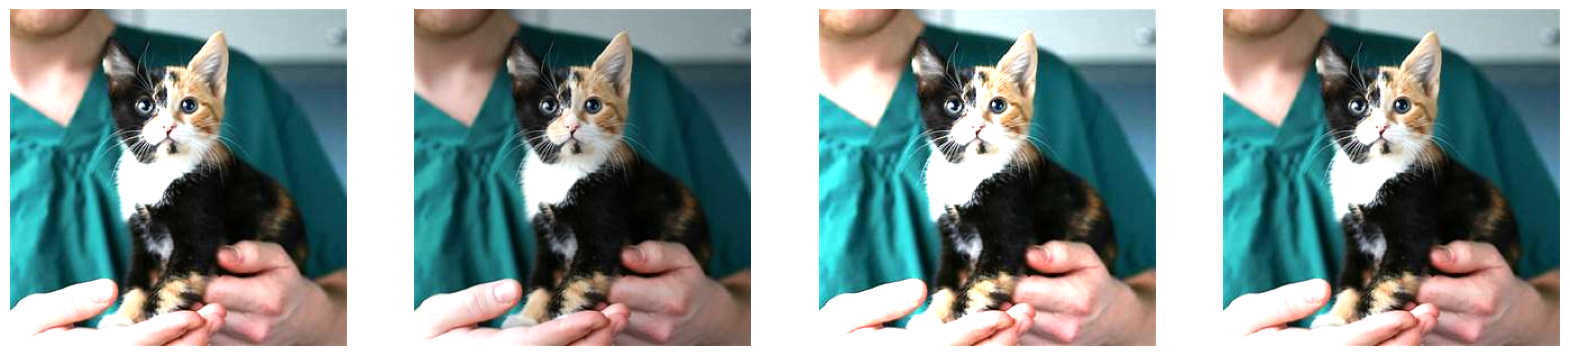

In [72]:
# Brightness : 밝기 조절
idg = ImageDataGenerator(brightness_range=(1.1,1.9))
show_aug_image_batch(image, idg)

In [ ]:
# Brightness : 밝기 조절
idg = ImageDataGenerator(brightness_range=(0.1,0.9))

In [ ]:
# channel shift 채널 변경
idg = ImageDataGenerator(channel_shift_range=150)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/animals/original'

idg = ImageDataGenerator(rescale=1./255)
generator = idg.flow_from_directory(
    root,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorycal'
)

ValueError: Invalid class_mode: categorycal; expected one of: {None, 'input', 'categorical', 'sparse', 'binary'}

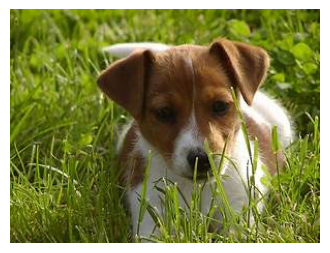

In [19]:
import cv2
import matplotlib.pyplot as plt


image = cv2.cvtColor(cv2.imread(generator.filepaths[803]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(4,4))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [20]:
def show_images(images, targets, ncols=4, title=None):
    figre, axs = plt.subplots(figsize=(ncols *5,4), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        axs[i].targets(images[i])


def repeat_aug(original_image=None, aug_image=None, target=None, aug=None, ncols=2):
    image_list=[original_image]
    target_list=['Original']

    original_image = aug(image=original_image)['image']
    image_list.append(aug_image)
    target_list.append(target)

    show_images(image_list, target_list, ncols=ncols)

In [21]:
import albumentations as A
import cv2
aug = A.HorizontalFlip

image = cv2.cvtColor(cv2.imread(generator.filepaths[803]), cv2.COLOR_BGR2RGB)

repeat_aug(original_image=image, target='HorizontalFlip', aug=aug)

TypeError: BasicTransform.__init__() got an unexpected keyword argument 'image'

In [ ]:
aug = A.Compose([
    A.VerticalFlip(p=0,5)
    
])

In [ ]:
aug = A.Crop(x_min=60, y_min=90 , x_max=200, y_max=300 p=1)
